# **K-means Clustering**

## **Pengertian K-means**
**K-Means Clustering** adalah salah satu algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok *(cluster)* berdasarkan kemiripan karakteristiknya. Tujuan utamanya adalah meminimalkan variasi dalam setiap cluster dan memaksimalkan perbedaan antar cluster.

## **Proses K-Means Clustering**

1. Pilih jumlah cluster (K) yang diinginkan.

2. Inisialisasi centroid awal secara acak (titik pusat cluster).

3. Hitung jarak setiap data ke semua centroid (biasanya pakai jarak Euclidean).

4. Kelompokkan data ke cluster dengan centroid terdekat.

5. Update centroid baru (rata-rata dari semua data dalam cluster).

6. Ulangi langkah 3–5 sampai centroid stabil (tidak berubah lagi).

## **Cara Kerja K-Means**
1. **Tentukan Jumlah Cluster (K):**

 - Misal mau bagi data jadi 3 kelompok, maka K=3.

2. **Pilih Titik Pusat Awal (Centroid):**

 - Acak 3 titik data sebagai "pusat" awal cluster (bisa juga pilih manual).

3. **Hitung Jarak & Kelompokkan:**

 - Setiap data dihitung jaraknya ke 3 centroid.

 - Data dimasukkan ke cluster dengan centroid terdekat.
(Pakai rumus jarak Euclidean: √[(x₁-x₂)² + (y₁-y₂)²])

4. **Update Posisi Centroid:**

 - Hitung ulang centroid baru (rata-rata koordinat semua data dalam cluster).
Contoh: Centroid baru = (rata-rata x semua data, rata-rata y semua data).

5. **Ulangi sampai Stabil:**

 - Kembali ke langkah 3, sampai centroid tidak bergeser lagi (atau hampir tidak berubah).



# **Keunggulan dan Kelemahan**

## **Keunggulan K-Means:**
1. **Cepat dan Efisien**

 - Cocok untuk dataset besar karena kompleksitas komputasinya rendah (O(n)).

 - Lebih cepat dibanding algoritma clustering lain (seperti Hierarchical Clustering).

2. **Mudah Diimplementasikan**

 - Algoritma sederhana dengan langkah yang jelas (hitung jarak, update centroid, ulangi).

 - Banyak library siap pakai (Scikit-learn, MATLAB, dll.).

3. **Hasil Mudah Ditafsirkan**

 - Cluster berbentuk spherical (bulat) dan padat, sehingga mudah divisualisasikan.

4. **Dapat Dikustomisasi**

 - Bisa digabung dengan teknik lain (misal: PCA untuk reduksi dimensi sebelum clustering).

## **Kelemahan K-Means:**
1. **Harus Tentukan K (Jumlah Cluster) di Awal**

 - Jika K tidak tepat, hasil bisa tidak optimal. Butuh metode tambahan (seperti Elbow Method, Silhouette Analysis) untuk memilih K.

2. **Sensitif terhadap Centroid Awal**

 - Inisialisasi centroid acak bisa menghasilkan cluster berbeda tiap percobaan (local optima).

 - Solusi: Pakai K-Means++ untuk inisialisasi lebih baik.

3. **Hanya Cocok untuk Data "Bulat" dan Ukuran Seragam**

- Buruk untuk data:

 - Berbentuk tidak teratur (seperti bulan sabit).

 - Memiliki kepadatan berbeda.

 - Memiliki outliers (centroid bisa tertarik ke data ekstrem).

4. **Bergantung pada Jarak Euclidean**

 - Kurang efektif untuk data kategori atau dimensi tinggi (curse of dimensionality).

5. **Tidak Ada Garansi Konvergen ke Solusi Global**

 - Hasil akhir mungkin hanya local optimum (tergantung inisialisasi awal)

## **Contoh Penerapan**
1. **Pengelompokan Dokumen**
- Analisis sentimen berdasarkan topik
2. **Analisis Citra**
- Kompresi warna gambar

## **Metode Evaluasi Klustering**

### **1. Inertia (Sum of Squared Errors - SSE)**

$J = \sum_{j=1}^k \sum_{x_i \in C_j} \|x_i - \mu_j\|^2$

**Kegunaan:** Mengukur kepadatan cluster

**Interpretasi:**

Nilai kecil → cluster lebih padat

Nilai besar → data tersebar jauh dari centroid

**Kelemahan:**

Tidak bisa menentukan
k optimal secara langsung

Biasanya dipadukan dengan Elbow Method



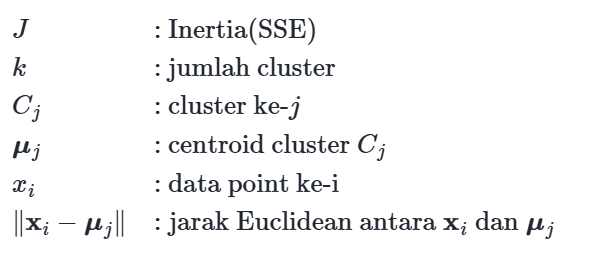


### **2. Silhouette Coefficient**

$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$

$\text{Silhouette Score} = \frac{1}{n}\sum_{i=1}^n s(i)$

**Variabel:**

a(i): Jarak rata-rata ke titik dalam cluster yang sama (intra-cluster)

b(i): Jarak ke cluster terdekat (inter-cluster)

**Range Nilai:**

−1 (worst) hingga
1 (best)

**Keunggulan:**

Mempertimbangkan struktur intra dan inter-cluster

Tidak bergantung pada jumlah cluster (
k
k)

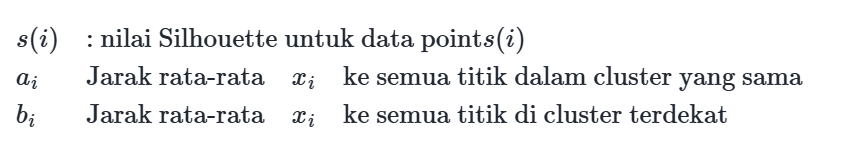

### **3. Elbow method**

$\text{Plot: } k \text{ vs Inertia}$

$\text{Inertia} = \sum_{i=1}^n \min_{\mu_j \in C} \|x_i - \mu_j\|^2$




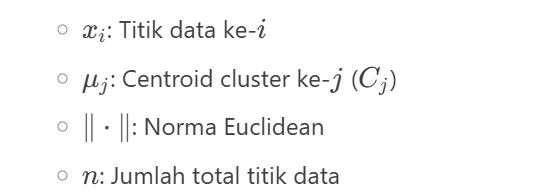

## **Langkah-langkah Analisis**
- Menghapus kolom 'class' dan 'id' (tidak diperlukan untuk klastering)

- Standardisasi data

- Melakukan K-Means clustering dengan k=3

- Menganalisis hasil klastering

# **Implementasi K-Means Menggunakan Dataset Iris**

## **Persiapan Data**

In [1]:
%pip install pandas numpy matplotlib scikit-learn tabulate seaborn sqlalchemy pymysql -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

Note: you may need to restart the kernel to use updated packages.


## **Koneksi Database Untuk data iris**

In [2]:
!pip install pymysql

In [3]:

import pandas as pd
from sqlalchemy import create_engine

# --- Detail Koneksi untuk MySQL di Aiven ---
user_mysql = "avnadmin" # Pastikan ini benar
password_mysql = "AVNS_9J8DXRANXLOevDxrFUf"
host_mysql = "mysql-1fd06db0-iris-pendat-sql.g.aivencloud.com"
port_mysql = 22661
database_mysql = "defaultdb"

db_url = (f"mysql+pymysql://{user_mysql}:{password_mysql}@{host_mysql}:{port_mysql}/{database_mysql}")
engine = create_engine(db_url)

# Contoh query: ganti dengan nama tabel kamu
query = "SELECT * FROM default_iris_mysql" # Pastikan tabel 'default_iris_mysql' ada

# Ambil data pakai pandas
data = pd.read_sql(query, engine)

# Tampilkan hasil
print(data)

OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'mysql-1fd06db0-iris-pendat-sql.g.aivencloud.com' ([Errno -2] Name or service not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

## **Library StandardScaler Untuk standarisasi data**

In [6]:
# Hapus kolom id dan class
X = data.drop(['id', 'class'], axis=1,inplace=False)

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data setelah Standarisasi:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Data setelah Standarisasi:
   petal length  petal width  sepal length  sepal width
0     -1.341272    -1.312977     -0.900681     1.032057
1     -1.341272    -1.312977     -1.143017    -0.124958
2     -1.398138    -1.312977     -1.385353     0.337848
3     -1.284407    -1.312977     -1.506521     0.106445
4     -1.341272    -1.312977     -1.021849     1.263460


## **Penjelasan:**

- Kita memuat dataset Iris dan menghapus kolom ‘id’ dan ‘class’ karena tidak diperlukan untuk klastering.

- Data kemudian distandardisasi menggunakan StandardScaler untuk memastikan semua fitur memiliki skala yang sama.

# **Menentukan Jumlah Klaster Optimal**
**Metode Elbow**

In [7]:
# Inisialisasi list untuk menyimpan metrik
sse = []
silhouette_scores = []
iterations = []
k_values = range(2, 5)  # k=2,3,4

# Hitung SSE dan Silhouette untuk setiap k
for k in k_values:
    kmeans = KMeans(n_clusters=k,
                    random_state=42,
                    n_init=10,
                    max_iter=500,
                    tol=1e-46)
    kmeans.fit(X_scaled)

    sse.append(kmeans.inertia_)  # SSE (Inertia)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    iterations.append(kmeans.n_iter_)

# Tampilkan dalam tabel
metrics_table = pd.DataFrame({
    'Number of Clusters (k)': k_values,
    'SSE (Inertia)': sse,
    'Silhouette Score': silhouette_scores,
    'Iterations': iterations
})

print("\nPerbandingan Metrik Klastering:")
print(tabulate(metrics_table, headers='keys', tablefmt='grid', showindex=False))


Perbandingan Metrik Klastering:
+--------------------------+-----------------+--------------------+--------------+
|   Number of Clusters (k) |   SSE (Inertia) |   Silhouette Score |   Iterations |
+==========================+=================+====================+==============+
|                        2 |         223.732 |           0.580184 |            7 |
+--------------------------+-----------------+--------------------+--------------+
|                        3 |         140.966 |           0.458972 |            4 |
+--------------------------+-----------------+--------------------+--------------+
|                        4 |         114.618 |           0.385285 |            4 |
+--------------------------+-----------------+--------------------+--------------+


## **Penjelasan:**

SSE (Sum of Squared Errors) menurun saat k meningkat (k=2 memiliki SSE tertinggi, k=4 terendah).

Silhouette Score tertinggi pada k=2 (0.52), menurun saat k bertambah.

k=3 mungkin optimal karena SSE turun signifikan dibanding k=2, tetapi Silhouette masih baik (~0.46).

Iterasi K-Means diamati untuk melihat efisiensi konvergensi algoritma. Nilai iterasi yang rendah menunjukkan bahwa K-Means cepat stabil, sementara nilai tinggi mengindikasikan struktur data yang lebih kompleks atau centroid awal yang kurang baik. Perbandingan antar k juga menunjukkan bagaimana kompleksitas klaster memengaruhi waktu konvergensi.

# **Visualisasi Metode Elbow**

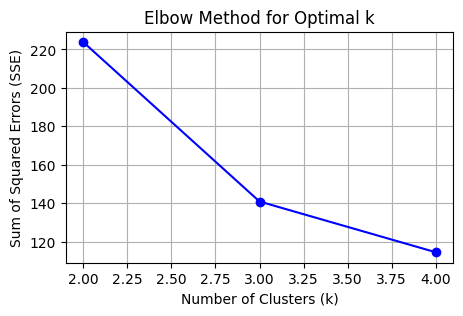

In [8]:
plt.figure(figsize=(5, 3))
plt.plot(k_values, sse, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# **Visualisasi Clushtering**

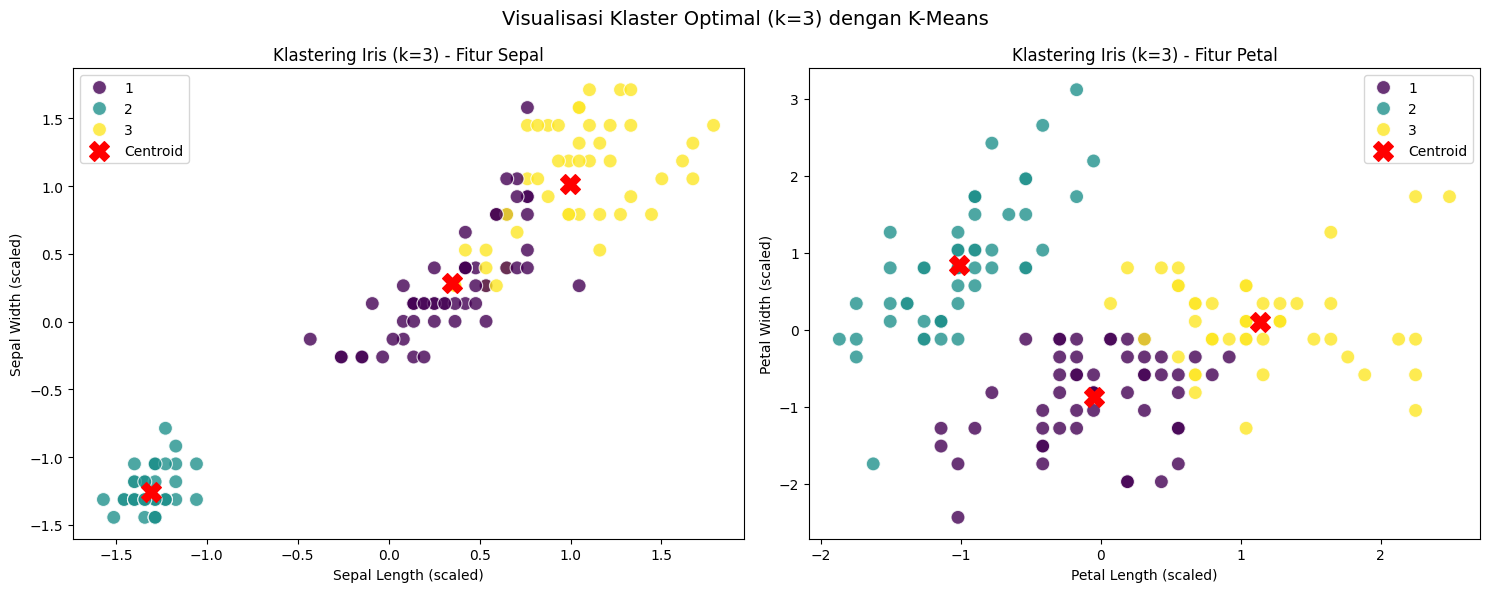

In [9]:
import seaborn as sns

# 1. Klastering dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.labels_ + 1

# 2. Visualisasi 2 Pasang Fitur (Sepal vs Petal)
plt.figure(figsize=(15, 6))

# --- Plot 1: Sepal Length vs Sepal Width ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=clusters, palette="viridis", s=100, alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, marker="X", c="red", label="Centroid"
)
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("Klastering Iris (k=3) - Fitur Sepal")
plt.legend()

# --- Plot 2: Petal Length vs Petal Width ---
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_scaled[:, 2], y=X_scaled[:, 3],
    hue=clusters, palette="viridis", s=100, alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
    s=200, marker="X", c="red", label="Centroid"
)
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("Klastering Iris (k=3) - Fitur Petal")
plt.legend()

plt.suptitle("Visualisasi Klaster Optimal (k=3) dengan K-Means", fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
# Menambahkan kolom cluster ke dataframe original
data['cluster'] = kmeans.labels_ + 1

# Menghitung jumlah data per cluster
cluster_counts = data['cluster'].value_counts().sort_index()
print("\nJumlah data per cluster:")
print(cluster_counts)


Jumlah data per cluster:
cluster
1    53
2    50
3    47
Name: count, dtype: int64


# **Menyimpan data Hasil (CSV)**

In [12]:
# Menyimpan data dengan kolom cluster ke file baru
data.to_csv('./Pendat/iris_with_clusters.csv', index=False)
print("\nData dengan cluster telah disimpan ke iris_with_clusters.csv")


Data dengan cluster telah disimpan ke iris_with_clusters.csv


## **Presentasae Ketidaksesuaian**

In [13]:
# Membaca data dari file CSV
cluster = pd.read_csv('./Pendat/iris_with_clusters.csv')

# Membuat mapping untuk label class ke numerik
class_mapping = {
    'Iris-versicolor': 1,
    'Iris-setosa': 2,
    'Iris-virginica': 3
}

# Menambahkan kolom numeric_class berdasarkan mapping
cluster['numeric_class'] = cluster['class'].map(class_mapping)

# Menghitung ketidaksesuaian (1 jika tidak sesuai, 0 jika sesuai)
cluster['mismatch'] = (cluster['numeric_class'] != cluster['cluster']).astype(int)

# Menghitung total dan persentase ketidaksesuaian
total_mismatches = cluster['mismatch'].sum()
total_samples = len(cluster)
mismatch_percentage = (total_mismatches / total_samples) * 100

# Menampilkan hasil
print(f"Total ketidaksesuaian: {total_mismatches} dari {total_samples} sampel")
print(f"Persentase ketidaksesuaian: {mismatch_percentage:.2f}%")

# Menampilkan detail ketidaksesuaian per class
print("\nDetail ketidaksesuaian per class:")
mismatch_detail = cluster.groupby('class')['mismatch'].agg(['sum', 'count'])
mismatch_detail['percentage'] = (
    mismatch_detail['sum'] / mismatch_detail['count']) * 100
print(mismatch_detail)

Total ketidaksesuaian: 25 dari 150 sampel
Persentase ketidaksesuaian: 16.67%

Detail ketidaksesuaian per class:
                 sum  count  percentage
class                                  
Iris-setosa        0     50         0.0
Iris-versicolor   11     50        22.0
Iris-virginica    14     50        28.0


# **Pengertian Dasar Fuzzy C-Means Clustering**

**Fuzzy C-Means (FCM)** Clustering adalah sebuah algoritma soft clustering (pengelompokan lunak) yang memungkinkan setiap titik data (data point) untuk menjadi anggota dari beberapa cluster sekaligus dengan derajat keanggotaan (membership degree) yang berbeda-beda. Ini berbeda dengan algoritma hard clustering seperti K-Means, di mana setiap titik data hanya bisa menjadi anggota dari satu cluster saja.

Dalam FCM, derajat keanggotaan sebuah titik data ke suatu cluster biasanya bernilai antara 0 dan 1. Jika nilainya mendekati 1, berarti titik data tersebut memiliki keterkaitan yang kuat dengan cluster tersebut. Sebaliknya, jika mendekati 0, keterkaitannya lemah. Jumlah total derajat keanggotaan sebuah titik data terhadap semua cluster harus sama dengan 1.

## **Cara Kerja Fuzzy C-Means Clustering(FCM)**

**FCM** bekerja secara iteratif untuk mengoptimalkan fungsi objektif (objective function) yang bertujuan untuk meminimalkan jarak antara titik data ke pusat cluster (centroid), dengan mempertimbangkan derajat keanggotaan fuzzy-nya.

**Tujuan utama FCM:** Mencari pusat kluster sedemikian rupa sehingga setiap data memiliki derajat keanggotaan terhadap tiap kluster.

## **Konsep Dasar Fuzzy C-Means**
1. **Fuzzy Logic:**

- Dalam logika fuzzy, suatu elemen dapat menjadi anggota dari beberapa himpunan (cluster) dengan derajat keanggotaan tertentu.
Tentu, berikut adalah penulisan ulang "Konsep Dasar Fuzzy C-Means" dari gambar tersebut, menggunakan format teks dengan LaTeX untuk rumus dan notasi matematikanya:


2. **Objective Function (Fungsi Tujuan):**
FCM meminimalkan fungsi objektif berikut:


  $$ J = \sum_{i=1}^{n} \sum_{j=1}^{c} u_{ij}^m \cdot \|x_i - v_j\|^2 $$

Dimana :

$ J $ = adalah fungsi objektif, biasanya digunakan dalam algoritma Fuzzy C-Means.

$u_{ij}$ = adalah derajat keanggotaan data ke-$i$
terhadap cluster ke-$J$.

$m$ = adalah parameter pembobot fuzzy (biasanya $m>1$).

$x_i$ = adalah vektor data ke-$i$

$v_j$ = adalah pusat cluster ke-$j$.

$|x_i - v_j|^2 $ = adalah jarak Euclidean kuadrat antara $x_i$ dan $v_j$



3. **Proses Iteratif:**

FCM bekerja secara iteratif dengan memperbarui:

**- Derajat Keanggotaan :**
$$u_{ij} = \frac{1}{\sum_{k=1}^{c} \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m-1}}}$$

**- Pusat Cluster $(v_j)$ :**

$$v_j = \frac{\sum_{i=1}^{n} u_{ij}^m x_i}{\sum_{i=1}^{n} u_{ij}^m}$$



## **Langkah-Langkah Algoritma FCM**
Algoritma FCM bekerja secara iteratif untuk mengelompokkan data dengan memberikan derajat keanggotaan pada setiap titik data ke semua cluster.

1. **Inisialisasi Awal**

- Tentukan jumlah cluster $(c)$ yang diinginkan.
- Tentukan parameter pemfuzian $(m>1$, biasanya $m=2)$.
- Inisialisasi matriks keanggotaan fuzzy $(U)$ secara acak, di mana setiap elemen $u_ij$
  adalah derajat keanggotaan data ke-i ke cluster ke-j. Pastikan jumlah $u_ij$
  untuk setiap data i di semua cluster j adalah 1.

2. **Proses Iterasi**
Ulangi langkah-langkah berikut hingga kondisi berhenti (konvergensi) terpenuhi:

3. **Hitung Pusat Cluster** (Centroid $v_j$) : Untuk setiap cluster $j$, hitung pusat clusternya menggunakan rumus:
$$v_j = \frac{\sum_{i=1}^{n} (u_{ij})^m x_i}{\sum_{i=1}^{n} (u_{ij})^m}$$
di mana $x_i$
  adalah data ke-$i$.

  Perbarui Matriks Keanggotaan ($u_ij$): Untuk setiap data i dan setiap cluster j, perbarui derajat keanggotaannya menggunakan rumus:
  $$u_{ij} = \frac{1}{\sum_{k=1}^{c} \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m-1}}}$$
di mana $∥x
i
​
 −v
j
​$
 ∥ adalah jarak (misalnya Euclidean) antara data x
i
​
  dan pusat cluster v
j
​

4. **Pengecekan Konvergensi**

Iterasi berhenti jika perubahan pada matriks keanggotaan ($U$) atau pusat cluster ($V$) antara iterasi saat ini dan sebelumnya sudah sangat kecil (di bawah ambang batas yang ditentukan), atau jika jumlah maksimum iterasi telah tercapai.



## **Keunggulan dan Kelemahan**
**Keunggulan FCM**

- Fleksibel: Data bisa masuk ke beberapa cluster sekaligus.

- Cocok untuk Data yang Tumpang Tindih: Berguna ketika batas antar-cluster tidak jelas.

- Lebih Stabil daripada K-Means: Karena menggunakan pendekatan probabilitas.

**Kelemahan FCM**

- Sensitif terhadap Inisialisasi Awal: Hasil bisa berbeda tergantung nilai awal.

- Komputasi Lebih Lambat: Karena proses iteratif yang kompleks.

- Harus Tentukan Jumlah Cluster ($c$): Tidak bisa menentukan $c$
 secara otomatis.

# **Implementasi Fuzzy C-Means Menggunakan Dataset Iris**

## **Persiapan Data**

In [14]:
%pip install scikit-fuzzy scikit-learn -q
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

## **Preview Data**

In [15]:
df = data
df.head()

,id,class,petal length,petal width,sepal length,sepal width,cluster
0,1,Iris-setosa,1.4,0.2,5.1,3.5,2
1,2,Iris-setosa,1.4,0.2,4.9,3.0,2
2,3,Iris-setosa,1.3,0.2,4.7,3.2,2
3,4,Iris-setosa,1.5,0.2,4.6,3.1,2
4,5,Iris-setosa,1.4,0.2,5.0,3.6,2


## **Standarisasi Data Z-Score**


In [16]:
X = df.iloc[:, 2:6].values
col = df.columns[2:6]
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data = pd.DataFrame(X_scaled, columns=col)
data.head()

,petal length,petal width,sepal length,sepal width
0,-1.341272,-1.312977,-0.900681,1.032057
1,-1.341272,-1.312977,-1.143017,-0.124958
2,-1.398138,-1.312977,-1.385353,0.337848
3,-1.284407,-1.312977,-1.506521,0.106445
4,-1.341272,-1.312977,-1.021849,1.263460


## **Menentukan Jumlah Cluster Optimal**

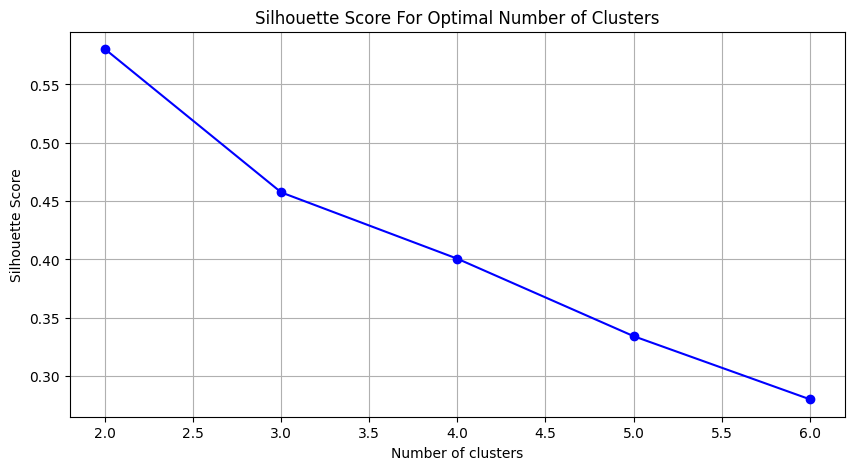

In [17]:
# Range jumlah cluster yang akan diuji
cluster_range = range(2, 7)

# Inisialisasi list untuk menyimpan hasil
inertia_values = []
silhouette_scores = []

# Uji berbagai jumlah cluster
for n_clusters in cluster_range:
    # Fuzzy C-Means
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_scaled.T, n_clusters, 2, error=0.005, maxiter=1000)

    # Hitung inersia (fuzzy partition coefficient)
    inertia = np.sum(jm)
    inertia_values.append(inertia)

    # Hitung silhouette score
    cluster_membership = np.argmax(u, axis=0)
    silhouette_avg = silhouette_score(X_scaled, cluster_membership)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal Number of Clusters')
plt.grid(True)
plt.show()

## **Melakukan Fuzzy C-Means dengan Jumlah Cluster Optimal**



In [18]:
# Pilih jumlah cluster optimal
optimal_clusters = 3

# Lakukan Fuzzy C-Means dengan cluster optimal
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, optimal_clusters, 2, error=0.005, maxiter=1000)

# Prediksi cluster untuk setiap data point
cluster_membership = np.argmax(u, axis=0)

# Buat DataFrame untuk visualisasi
vis_df = pd.DataFrame(X_scaled, columns=['petal_length', 'petal_width', 'sepal_length', 'sepal_width'])
vis_df['cluster'] = cluster_membership

## **Visualisasi Sepal (Sepal Length vs Sepal Width)**

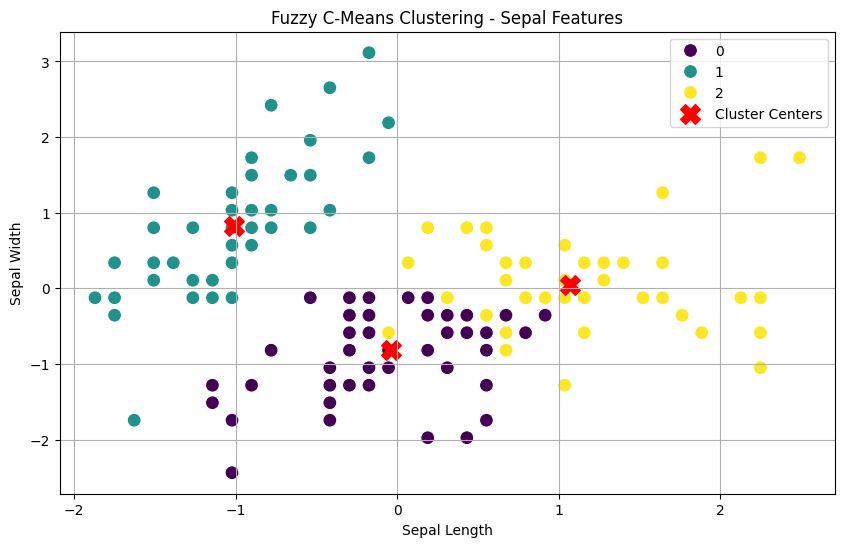

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vis_df, x='sepal_length', y='sepal_width',
                hue='cluster', palette='viridis', s=100)
plt.scatter(cntr[:, 2], cntr[:, 3], marker='X', s=200,
            color='red', label='Cluster Centers')
plt.title('Fuzzy C-Means Clustering - Sepal Features')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

## **Visualisasi Petal (Petal Length vs Petal Width)**

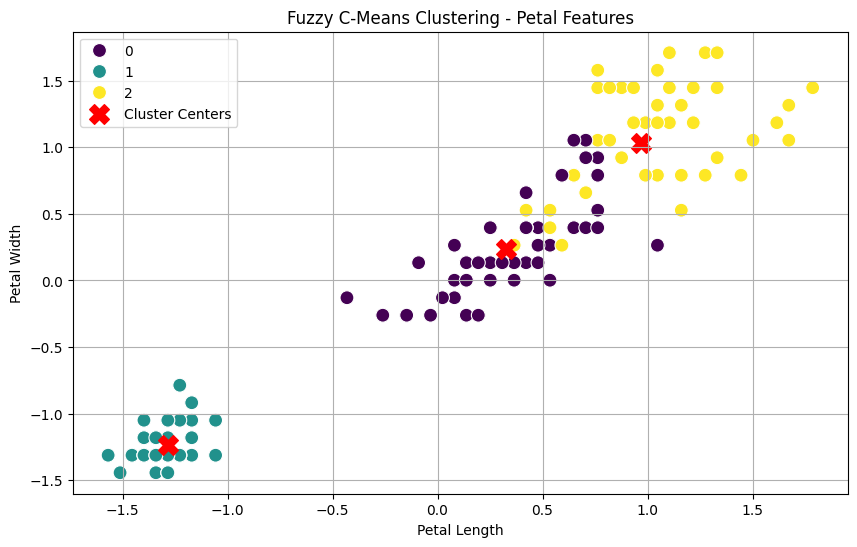

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vis_df, x='petal_length', y='petal_width',
                hue='cluster', palette='viridis', s=100)
plt.scatter(cntr[:, 0], cntr[:, 1], marker='X', s=200,
            color='red', label='Cluster Centers')
plt.title('Fuzzy C-Means Clustering - Petal Features')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid(True)
plt.show()